<a href="https://colab.research.google.com/github/al34n1x/DataScience/blob/master/4.Estadistica/Estadistica_Sesi%C3%B3n_2_Con_soluciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro a la estadística (Sesión 2)

---




Hasta ahora hemos analizado las estadísticas univariadas, es decir, una variable que forma una distribución. **Estadísticas bivariadas** mira dos variables, por ejemplo:

* Carbono orgánico total (TOC) de la muestra de roca Y diversidad fósil.

La idea es buscar la relación entre variables, por ejemplo:

* ¿La diversidad fósil es menor cuando el TOC es mayor?

Si podemos demostrar que hay una relación, entonces podemos comenzar a buscar posibles causas. Para estudiar visualmente problemas bivariados, usamos diagramas de dispersión.


## Ejemplo de diagrama de dispersión: ¿Las marcas de trabajo de campo de Dorset predicen el rendimiento general del año?

Aquí vamos a crear un diagrama de dispersión de dos variables (deberá usar el archivo de datos [/data/first_year_marks.csv](http://cdn.jsdelivr.net/gh/al34n1x/DataScience/data/first_year_marks.csv)).

In [1]:
import numpy as np
record = np.recfromcsv('http://cdn.jsdelivr.net/gh/al34n1x/DataScience/data/first_year_marks.csv',delimiter=',', names=True)

print (record.dtype.names)

('field_mark', 'overall_year')


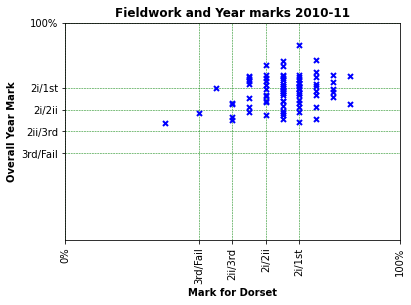

In [2]:
import matplotlib.pyplot as plt

# Ahora que tenemos los encabezados CSV, leo los registros en arrays de numpy.
fieldmarks = np.array(record["field_mark"],   dtype=float)
yearmarks  = np.array(record["overall_year"], dtype=float)


# 'bx' significa marcadores azules 'x'
# zorder = 3 para asegurarse de que esté delante de la cuadrícula
plt.plot(fieldmarks, yearmarks, 'bx', markersize=5, markeredgewidth=2, zorder=3)
                            
# No etiquetar un gráfico es imperdonable. 
plt.ylabel("Overall Year Mark",weight='bold')
plt.xlabel("Mark for Dorset",weight='bold')

# El resto es bonus
plt.xlim(0, 100)                 # ambas escalas entre 0 y 100
plt.ylim(0, 100)

# Las etiquetas de marca son largas y ocupan mucho espacio. Para mejorar
# la legibilidad de nuestro código podemos almacenarlos como listas llamadas:
# xticktitles y yticktitles
xticktitles = ["0%", "3rd/Fail", "2ii/3rd", "2i/2ii", "2i/1st", "100%"]
yticktitles = ["3rd/Fail", "2ii/3rd", "2i/2ii", "2i/1st", "100%"]

# Marcas y etiquetas para configurar por límites de categoría
plt.xticks([0, 40, 50, 60, 70, 100],xticktitles, rotation="vertical")
plt.yticks([40, 50, 60, 70, 100],   yticktitles)

# Activamos la cuadrícula con finas líneas verdes punteadas
plt.grid(linestyle='--', linewidth=.5, color='green',zorder=1)

# Titulos
plt.title("Fieldwork and Year marks 2010-11",weight='bold')

# Mostrar el gráfico
plt.show()

Esto solo muestra una relación visual, por lo que, si bien en la trama parece que no hay una relación sólida, ¿podemos ser más cuantitativos? ¿Son estas dos variables realmente independientes?

# Regresión lineal

Un enfoque común para los datos bivariados es modelarlos matemáticamente, por ejemplo, ajustando una línea (*regresión lineal*). Esto no es apropiado si solo hay una relación débil.

También es posible arreglar curvas más complejas, pero en este curso nos limitaremos a la regresión lineal.

Existen muchos métodos matemáticos para encontrar la mejor línea de ajuste. Por mucho, el más utilizado es el *método de mínimos cuadrados* que minimiza la suma de los cuadrados de los errores verticales. Esto se puede calcular en Python usando el método [scipy.stats.linregress](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) que devuelve la pendiente, $ m $, e interceptar, $ c $ parámetros para la ecuación de la línea:

$$y = mx + c.$$

# Ejercicio 2.1

1. Lea el archivo [/data/BrachiopodBiometrics.txt](http://cdn.jsdelivr.net/gh/al34n1x/DataScience/data/BrachiopodBiometrics.txt).
2. Cree un diagrama de dispersión: etiquete el diagrama de manera adecuada.
3. Use la regresión lineal para ajustar una línea a los datos.
4. Superponga la línea en el diagrama de dispersión.

In [0]:
# Ingrese su solución aquí

In [4]:
import numpy as np

# Read in the records.
record = np.recfromcsv("http://cdn.jsdelivr.net/gh/al34n1x/DataScience/data/BrachiopodBiometrics.txt") 

print(record.dtype.names)

('locality', 'lengthmm', 'widthmm')


/usr/local/lib/python3.6/dist-packages/numpy/lib/npyio.py:2372: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [5]:
# Convert this to numpy arrays.
lengthmm = np.array(record["lengthmm"], dtype=float)
widthmm = np.array(record["widthmm"], dtype=float)

print(lengthmm)
print(widthmm)

[2.3  2.95 3.1  3.7  3.5  2.35 4.   4.   2.75 2.95 5.   2.7  3.   3.2
 2.3  2.75 3.4  3.5  3.75 2.8  2.8  2.5  3.6  3.3  3.35 3.7  3.6  3.
 3.3  3.3  2.95 3.4  2.3  4.4  2.7  2.8  3.9  2.7  3.7  3.8  3.1  2.7
 3.5  3.   3.3  3.3  3.4  3.1  4.   3.7  3.2  3.25 3.8  3.45 5.5  3.6
 4.   4.75 4.87 3.6  4.   5.25 4.4  3.5  3.3  2.6  5.15 4.05 3.4  3.5
 2.1  4.65 5.1  3.9  3.35]
[2.1  2.85 2.8  3.5  4.6  2.3  3.9  4.2  2.55 2.7  5.1  2.7  2.9  3.4
 2.2  2.7  3.2  3.2  3.6  2.75 2.6  2.7  4.   3.2  3.3  4.1  3.45 3.2
 3.3  3.2  2.9  3.4  2.7  3.9  2.5  2.8  3.6  3.   3.55 4.   3.1  2.2
 3.2  3.1  3.2  3.3  3.25 3.   4.   3.6  3.5  3.2  3.75 3.65 4.65 3.5
 3.75 4.35 4.16 3.3  3.4  4.5  4.45 2.7  2.7  2.7  4.15 3.45 3.75 3.25
 2.3  4.5  5.25 3.25 3.5 ]


r and p values of linear regression:  0.8940579455080504 3.596118391396733e-27
pendiente e intercept:  0.8198083160045666 0.5163270390705401


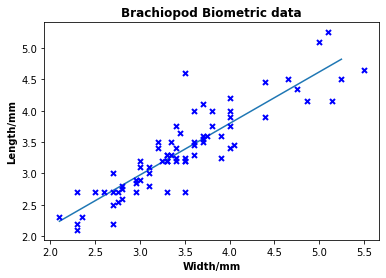

In [6]:
plt.plot(lengthmm, widthmm, 'bx', markersize=5, markeredgewidth=2, zorder=3)
                            # 'bx' - blue 'x' markers, 10 points in size, 
                            # drawn in a thickish line.
                            # zorder=3 to make sure this is in front of grid

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(lengthmm, widthmm)
x = np.array([lengthmm.min(), widthmm.max()])
y = slope*x+intercept
plt.plot(x,y)

print("r and p values of linear regression: ", r_value, p_value)
print("pendiente e intercept: ", slope, intercept)

# Not labeling a graph is unforgivable. This is the minimum that should be in any graph.  
plt.ylabel("Length/mm",weight='bold')
plt.xlabel("Width/mm",weight='bold')

plt.title("Brachiopod Biometric data",weight='bold')
plt.show()

# Correlación
Trazar un diagrama de dispersión da una idea visual de qué tan bien están relacionadas o correlacionadas dos variables. Sin embargo, la correlación también se puede definir matemáticamente en términos de *valores r*, que tienen valores en el rango de -1 a 1:

| valor-r | Interpretación |
|: ------ |: -------------- |
| -1 |Correlación negativa perfecta |
| -0,70 |Fuerte correlación negativa |
| -0,50 |Correlación negativa moderada |
| -0,30 |Correlación negativa débil |
| 0 |Sin correlación |
| 0,30 |Correlación débil |
| 0,50 |Correlación moderada |
| 0,70 |Fuerte correlación |
|1 |Correlación perfecta |

Existen métodos comúnmente utilizados para calcular los coeficientes de correlación:

* Coeficiente de Pearson (o coeficiente de correlación del producto-momento).
* Coeficiente de correlación de Spearman.

Para explicarlos y las diferencias entre ellos, necesitamos cubrir algunos conceptos básicos más, a saber:

* Probabilidad.
* Distribuciones normales.
* Estadísticas paramétricas vs no paramétricas.

# Probabilidad

La probabilidad, $p$ de que ocurra un evento se define como un valor en el rango $(0, 1)$ donde:

* $ p = 0 $ implica que el evento nunca ocurrirá.
* $ p = 1 $ implica que el evento siempre ocurrirá.

Un ejemplo clásico es el lanzamiento de dados. La probabilidad de lanzar un tiro de 6 en un dado es $ 1/6 $ $ (= 0.167) $. La probabilidad de todos los resultados posibles sumarán 1.


# Probabilidad y distribuciones

Cuando tratamos de determinar si dos variables están relacionadas / correlacionadas, estamos hablando inmediatamente en términos de probabilidad. Es posible que cualquier relación aparente sea por casualidad. Así que tratamos de determinar qué tan improbable es esto como un *valor-p*.

Usamos histogramas de muestras para obtener los diagramas subyacentes de distribución de probabilidad. Usamos curvas de distribución de probabilidad integrando el área debajo de la curva para calcular la probabilidad de muestreo a partir de un rango de valores (no se puede hablar de la probabilidad de obtener un valor particular ... ¿por qué no?) La integral debajo de la curva completa es 1 (¿por qué?)


# Distribuciones normales

Muchas distribuciones del mundo real se aproximan a una "forma de campana". Esta forma se conoce como distribución *Normal* o *Gaussiana*. ¡Es muy importante en estadísticas y lo encontrarás muchas veces!

Distribución normal se define matemáticamente como:

$$ f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

donde $\sigma$ es el desvío estándar y $\mu$ es la media. No necesita conocer la fórmula de memoria, pero sí debe saber que solo depende de la *media* y del *desvío estándar*.

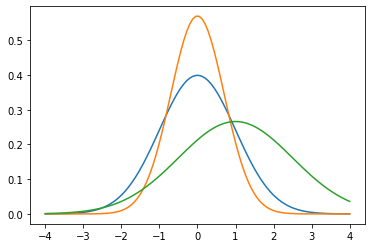

In [7]:
x = np.linspace(-4, 4, 100)
from scipy import stats
from numpy import sqrt, pi, exp
for mu, sigma in ((0, 1), (0, 0.7), (1, 1.5)):
    y = sqrt(1/(2*pi*sigma**2))*exp(-(x-mu)**2/(2*sigma**2))
    plt.plot(x, y)
plt.show()

Las distribuciones normales son importantes ya que muchos métodos estadísticos inferenciales suponen que las distribuciones son normales. Sin embargo, ninguna distribución en el mundo real es completamente normal. A menudo, las personas suponen que las desviaciones de la normalidad son menores, ¡esto puede ser problemático!

Considere el histograma de 2000 marcas generales de módulos de ESESIS (deberá usar el archivo [/data/2000marks.csv](http://cdn.jsdelivr.net/gh/al34n1x/DataScience/data/2000marks.csv).

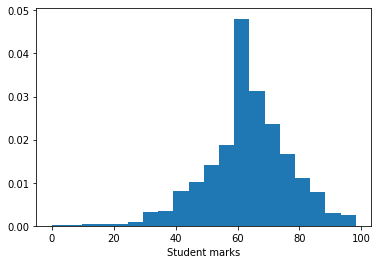

In [8]:
record = np.recfromtxt("http://cdn.jsdelivr.net/gh/al34n1x/DataScience/data/2000marks.csv")
marks = np.array(record, dtype=float)
plt.hist(marks, density=True, bins=20)
plt.xlabel("Student marks")
plt.show()

¿Este gráfico se distribuye normalmente? Más o menos, pero noten:

* Gran pico alrededor de los 60.
* Sesgado - cola larga izquierda.

# Volviendo a la correlación

## Coeficiente de Pearson o (coef de correlación producto-momento).
Este es el método más utilizado para obtener un valor r para la correlación. No entraremos en las matemáticas involucradas aquí, pero debe tener en cuenta su principal limitación: **se supone que las distribuciones que se comparan se distribuyen normalmente**.

Para complicar aún más las cosas, no está claro cuánta desviación se permite ... más sobre esto más adelante.

Puede calcular un valor de probabilidad para un valor r de Pearson usando [scipy.stats.pearsonr](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr).

Supongamos que calculamos un valor r de 0.3 para dos muestras en particular, y queremos saber si esto proviene de una correlación verdadera, o podría haber sucedido por casualidad. Para esto tenemos el valor p. El valor p indica aproximadamente la probabilidad de que un sistema *no correlacionado* produzca conjuntos de datos que tengan un valor r al menos tan extremo como el calculado a partir de estos conjuntos de datos. Los valores p no son completamente confiables, pero probablemente sean razonables para conjuntos de datos mayores de 500 aproximadamente.


In [9]:
# Veamos un ejemplo trivial: generemos datos donde x == y.
d1 = np.linspace(-1, 1, 1000)
d2 = np.linspace(-1, 1, 1000)

r, p = stats.pearsonr(d1, d2)

print("r-value (coeficiente de correlación)",r)
print("p-value (Probabilidad de que nos hayamos equivocado)",p)

r-value (coeficiente de correlación) 0.9999999999999998
p-value (Probabilidad de que nos hayamos equivocado) 0.0


## Correlación no paramétrica

Un método alternativo para la correlación es el *coeficiente de correlación de rango de Spearman*. Este es un estadístico no paramétrica, lo que significa que no se basa en que los datos subyacentes sean de ninguna distribución en particular.

Puede calcular el coeficiente de correlación de rango de Spearman usando [scipy.stats.spearmanr](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr)

En este caso, el valor p indica aproximadamente la probabilidad de que un sistema no correlacionado produzca conjuntos de datos que tengan una correlación de Spearman al menos tan extrema como la calculada a partir de estos conjuntos de datos. Como es el caso con el coeficiente de correlación de Pearson, los valores p no son completamente confiables, pero probablemente sean razonables para conjuntos de datos mayores de 500 aproximadamente.

**Lo ideal es usar Pearson si los datos se distribuyen normalmente.**

In [10]:
# Lo intentamos de nuevo con nuestro dataset trivial
r, p = stats.spearmanr(d1, d2)

print("r-value (coeficiente de correlación)",r)
print("p-value (Probabilidad de que nos hayamos equivocado)",p)

r-value (coeficiente de correlación) 1.0
p-value (Probabilidad de que nos hayamos equivocado) 0.0


# Ejercicio 2.2

Para el conjunto de datos [/data/first_year_marks.csv](http://cdn.jsdelivr.net/gh/al34n1x/DataScience/data/first_year_marks.csv):

* Calcule los valores r y p utilizando las metodologías de correlación de Pearson y Spearman.
* ¿Se correlacionan estos datos? Si es así, ¿la correlación es débil o fuerte?
* Trace los histogramas de cada una de las dos variables y superponga las curvas normales a los histogramas. ¿Qué tan bien combinan?

In [11]:
# Escriba la solución aquí
import numpy as np

# Read in the records.
record = np.recfromcsv("http://cdn.jsdelivr.net/gh/al34n1x/DataScience/data/first_year_marks.csv") 

print(record.dtype.names)

('field_mark', 'overall_year')


In [12]:
field_mark = np.array(record["field_mark"], dtype=float)
overall_year = np.array(record["overall_year"], dtype=float)

from scipy import stats
print("Pearson's r and p values:  %g, %g"%stats.pearsonr(field_mark, overall_year))
print("Spearman's r and p values:  %g, %g"%stats.spearmanr(field_mark, overall_year))

Pearson's r and p values:  0.269354, 0.0144025
Spearman's r and p values:  0.18995, 0.087402


¿Están estos datos correlacionados en absoluto? Si es así, ¿la correlación es débil o fuerte?

La correlación de Pearson sugiere una correlación muy débil, mientras que la correlación de Spearman no sugiere correlación. Teniendo en cuenta que ya sabemos por la conferencia que las marcas no siguen una distribución normal (de hecho, esto es algo que mostraremos a continuación), debemos concluir que debemos usar la correlación de Spearman.

Por lo tanto, usando el coeficiente de correlación de Spearman podemos concluir que no hay correlación. Sin embargo, dado el valor p relativamente alto que tendríamos que concluir que no hay evidencia suficiente para tomar una decisión. Más detalles adelante.

Trace los histogramas de cada una de las dos variables y superponga las curvas normales a los histogramas: ¿qué tan bien coinciden?

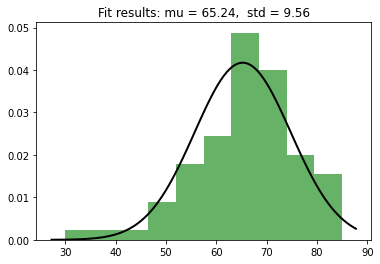

In [13]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


# Generate some data for this demonstration.
data = field_mark

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=10, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

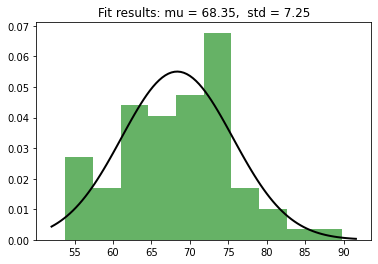

In [14]:
# Generate some data for this demonstration.
data = overall_year

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=10, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

## Ejercicio 2.3

Para esta práctica, necesitará los datos de respuesta de choque para arena. Esto se puede encontrar en el archivo [/data/sand_swdb.txt](http://cdn.jsdelivr.net/gh/al34n1x/DataScience/data/sand_swdb.txt), tomado de la base de datos de ondas de choque.

## Ejercicio 2.3.1
* Abra el archivo de texto y eche un vistazo, vea con qué está trabajando.
* Lea en el archivo sand_swdb.txt en dos conjuntos llamados presión y energía.
* Recuerde que no desea que se incluyan líneas 'comentadas' en el archivo de texto, ¿cómo haría esto?

## Ejercicio 2.3.2

* Haz un diagrama de dispersión de la presión contra la energía.
* Etiquete los ejes apropiadamente (incluya unidades).
* Realice una regresión lineal en los datos y superponga la línea de mejor ajuste en el gráfico (como una línea discontinua).
* Agregue una leyenda al diagrama y etiquete la línea de mejor ajuste con su valor r. p.ej. r = 0.5.
* Agregue (o cambie) el título de su diagrama para que sea y = {} x + {} y complete con los parámetros de ajuste.

## BONUS (más difícil)

* Rehaga su gráfico, pero esta vez con barras de error verticales del 10% en cada punto.

Para esta práctica, debe hacer un uso extensivo de la documentación de matplotlib.

In [0]:
# Escriba su solución aquí

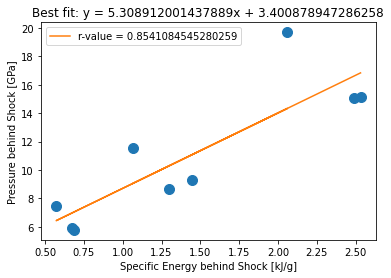

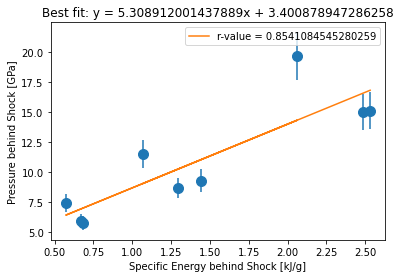

In [17]:

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

data = np.genfromtxt('http://cdn.jsdelivr.net/gh/al34n1x/DataScience/data/sand_swdb.txt', comments='#')
# Genfromtxt usará un delimitador de un espacio o tabulación por defecto, y especificando
# comentarios como '#' significa que ignorará cualquier línea en el archivo de texto que comience con
# '#' como en un script de Python. Esto lee los datos como una matriz numpy 2D.

"""BONUS POINTS"""
# Otra forma
P    = np.genfromtxt('http://cdn.jsdelivr.net/gh/al34n1x/DataScience/data/sand_swdb.txt', comments='#', usecols=0)
E    = np.genfromtxt('http://cdn.jsdelivr.net/gh/al34n1x/DataScience/data/sand_swdb.txt', comments='#', usecols=1)
"""############"""


Pressure = data[:, 0]
Energy   = data[:, 1]
# Dividimos en dos arrays

M, C, R, P, err = stats.linregress(Energy,Pressure)
# Regresión lineal en energía y presión, para dar coeficientes de M y C
# de y = Mx + C; Valor R, valor p y el error estándar.

plt.figure()
# Iniciamos la figura
plt.plot(Energy, Pressure, linestyle=' ', marker='o', markersize=10)
# Grafico la presión contra la energía. Sin línea, marcadores circulares, tamaño 10
plt.plot(Energy, Energy*M+C, linestyle='-', label = 'r-value = {}'.format(R))
# Trace la línea que mejor se ajuste, use los valores de Energía en el eje x y calcule
# los valores de y correspondientes usando y = mx + c.
# Etiqueto esto con el valor r, y use formato condicional para insertarlo.
plt.xlabel('Specific Energy behind Shock [kJ/g]')
plt.ylabel('Pressure behind Shock [GPa]')
# Etiqueto los ejes, según los datos del archivo de texto
plt.title('Best fit: y = {}x + {}'.format(M,C))
# Utilice el formato condicional para etiquetar el título con la ecuación de la línea de mejor ajuste
plt.legend(loc='best')
# Agregue una leyenda, esta contendrá todas las etiquetas de cada función de 'trama'.
# EXTRA: agrega un argumento 'loc' para dar una ubicación para la leyenda. 'mejor' lo pone en el
# mejor lugar posible, para mostrar la mayor cantidad de datos posible.

plt.figure()
plt.errorbar(Energy, Pressure, yerr=Pressure*.1, linestyle=' ', marker='o', markersize=10)
# Para agregar barras de error, use la función de barra de error, 
# y ahora solo agregue el argumento 'yerr'. Para hacer
# las barras de error 10% simplemente multiplican los valores de Presión
# por 0.1 y lo asignan a su año.
# Las barras de error serán +/- 10%.
plt.plot(Energy, Energy*M+C, linestyle='-', label = 'r-value = {}'.format(R))
plt.xlabel('Specific Energy behind Shock [kJ/g]')
plt.ylabel('Pressure behind Shock [GPa]')
plt.title('Best fit: y = {}x + {}'.format(M,C))
plt.legend(loc='best')
plt.show()